In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")

In [6]:
df_tweets = pd.read_csv('demonetization-tweets.csv', parse_dates=['created'], header=0, encoding="ISO-8859-1")
df_tweets.head(2)


,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False


In [11]:
df_tweets['hour'] = pd.DatetimeIndex(df_tweets['created']).hour
df_tweets['date'] = pd.DatetimeIndex(df_tweets['created']).date
df_tweets['count'] = 1
df_tweets_filtered = df_tweets[['hour', 'date', 'count', 'retweetCount']]
df_tweets_filtered.head(2)

,hour,date,count,retweetCount
0,18,2016-11-23,1,331
1,18,2016-11-23,1,66


In [12]:
df_tweets_hourly = df_tweets_filtered.groupby(["hour"]).sum().reset_index()
df_tweets_hourly.head(2)

C:\Users\gudla\AppData\Local\Temp\ipykernel_53728\1699979354.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_tweets_hourly = df_tweets_filtered.groupby(["hour"]).sum().reset_index()


,hour,count,retweetCount
0,0,222,31868
1,1,307,65764


<AxesSubplot:title={'center':'Number of re-tweets per hour'}>

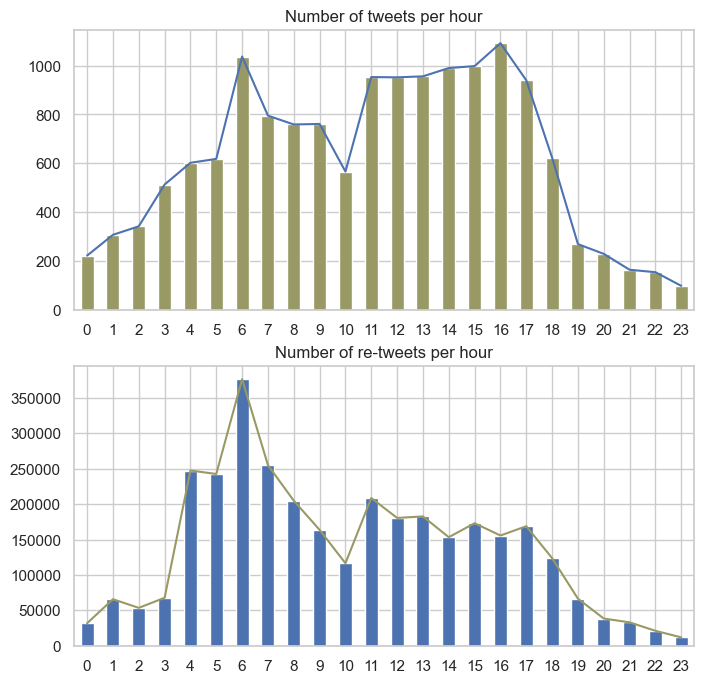

In [13]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
ax1.title.set_text("Number of tweets per hour")
df_tweets_hourly["count"].plot.bar(ax=ax1, color='#999966')
df_tweets_hourly["count"].plot(ax=ax1)

ax2.title.set_text("Number of re-tweets per hour")
df_tweets_hourly["retweetCount"].plot.bar(ax=ax2)
df_tweets_hourly["retweetCount"].plot(ax=ax2, color='#999966')

In [14]:
pivot_df = df_tweets_filtered.pivot_table(df_tweets_filtered, index=["date", "hour"], aggfunc=np.sum)
print(pivot_df)
dates = pivot_df.index.get_level_values(0).unique

                 count  retweetCount
date       hour                     
2016-11-22 10       21          6058
           11      318         82888
           12      387         63582
           13      382         70898
           14      349         64110
...                ...           ...
2017-04-21 13       24           311
           14       27           545
           15       23          2189
           16       21           225
           17        6          1440

[277 rows x 2 columns]
